# dataset user_data.csv [link](https://www.kaggle.com/datasets/erscodingzone/user-datacsv)

#**1. Data Pre-processing step**

In [ ]:
#Data Pre-processing Step
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [ ]:
#importing datasets
data_set= pd.read_csv('/content/User_Data.csv')
data_set.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
#print(x)
y= data_set.iloc[:, 4].values
#print(y)

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
print(x_train.shape , x_test.shape)

(300, 2) (100, 2)


In this case, test_size=0.25 means that 25% of the data will be reserved for testing, and the remaining 75% will be used for training the machine learning model.

Setting a specific random_state ensures reproducibility. If you use the same random_state value in different runs, you'll get the same split each time.

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
print(x_train.shape, x_test.shape)

(300, 2) (100, 2)


#Fitting the SVM classifier to the training set:

>Now the training set will be fitted to the SVM classifier. To create the SVM classifier, we will import SVC class from Sklearn.svm library.

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In the above code, we have used kernel='linear', as here we are creating SVM for linearly separable data. However, we can change it for non-linear data. And then we fitted the classifier to the training dataset(x_train, y_train)

The model performance can be altered by changing the value of C(Regularization factor), gamma, and kernel.

#**Predicting the test set result:**
Now, we will predict the output for test set. For this, we will create a new vector y_pred.

In [ ]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

#**Creating the confusion matrix:**
Now we will see the performance of the SVM classifier that how many incorrect predictions are there. To create the confusion matrix, we need to import the confusion_matrix function of the sklearn library. After importing the function, we will call it using a new variable cm. The function takes two parameters, mainly y_true( the actual values) and y_pred (the targeted value return by the classifier). Below is the code for it:

In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred) #y_test =orih=ginal data
cm

array([[64,  4],
       [ 3, 29]])

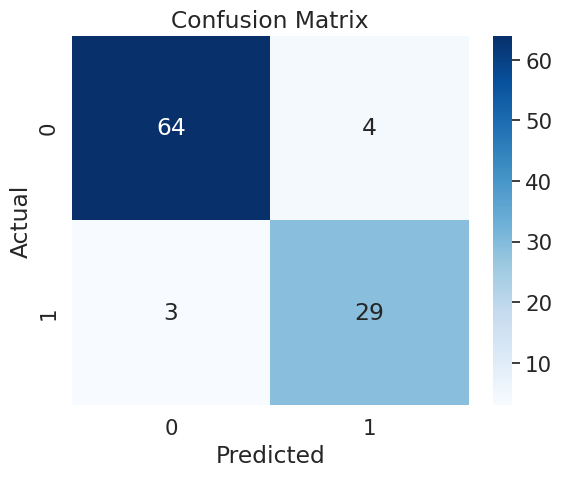

In [ ]:
# Set the font scale for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


As we can see in the above output image, there are 66+24= 90 correct predictions and 8+2= 10 correct predictions. Therefore we can say that our SVM model improved as compared to the Logistic regression model.

#**Visualizing the training set result:**
Now we will visualize the training set result, below is the code for it:

/tmp/ipython-input-2586313561.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


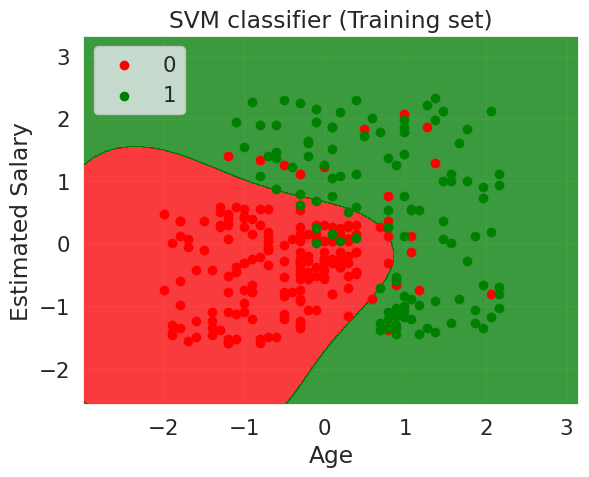

In [ ]:
from matplotlib.colors import ListedColormap
#This creates a meshgrid using NumPy's arange to cover the range of feature values in the training set.
#x1 and x2 are 2D arrays representing the coordinates of points in the meshgrid.
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
#This line creates a filled contour plot using the SVM classifier's predictions on the meshgrid.
#The decision boundary is visualized as the area where the predictions change.
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
#Scatter plots the training set points,
#differentiating them by class with different colors ('red' and 'green' in this case).
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)

#These lines set the plot limits, title, labels, and legend, and then display the plot.
mtp.title('SVM classifier (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

As we can see, the above output is appearing similar to the Logistic regression output. In the output, we got the straight line as hyperplane because we have used a linear kernel in the classifier. And we have also discussed above that for the 2d space, the hyperplane in SVM is a straight line.

#**Visualizing the test set result:**

/tmp/ipython-input-812965198.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


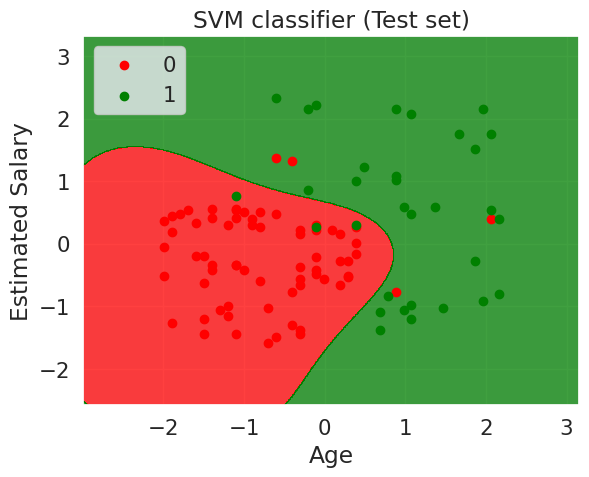

In [ ]:
#Visulaizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('SVM classifier (Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

As we can see in the above output image, the SVM classifier has divided the users into two regions (Purchased or Not purchased). Users who purchased the SUV are in the red region with the red scatter points. And users who did not purchase the SUV are in the green region with green scatter points. The hyperplane has divided the two classes into Purchased and not purchased variable.
